<a href="https://colab.research.google.com/github/bala-baskar/deep_learning_path/blob/main/courses/IITM_CS7015_Deep%20learning/deep_learning_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
import kagglehub

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
data_path = kagglehub.dataset_download("zalando-research/fashionmnist")
data_path

'/kaggle/input/fashionmnist'

In [4]:
train_df = pd.read_csv(os.path.join(data_path,"fashion-mnist_train.csv"))
test_df = pd.read_csv(os.path.join(data_path,"fashion-mnist_test.csv"))
print(train_df.shape, test_df.shape)

(60000, 785) (10000, 785)


In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.drop('label',axis=1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
X_train = np.array(train_df.drop('label',axis=1))
y_train = np.array(train_df['label'])
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [60]:
X_test = np.array(test_df.drop('label',axis=1))
y_test = np.array(test_df['label'])
X_test.shape, y_test.shape

((10000, 784), (10000,))

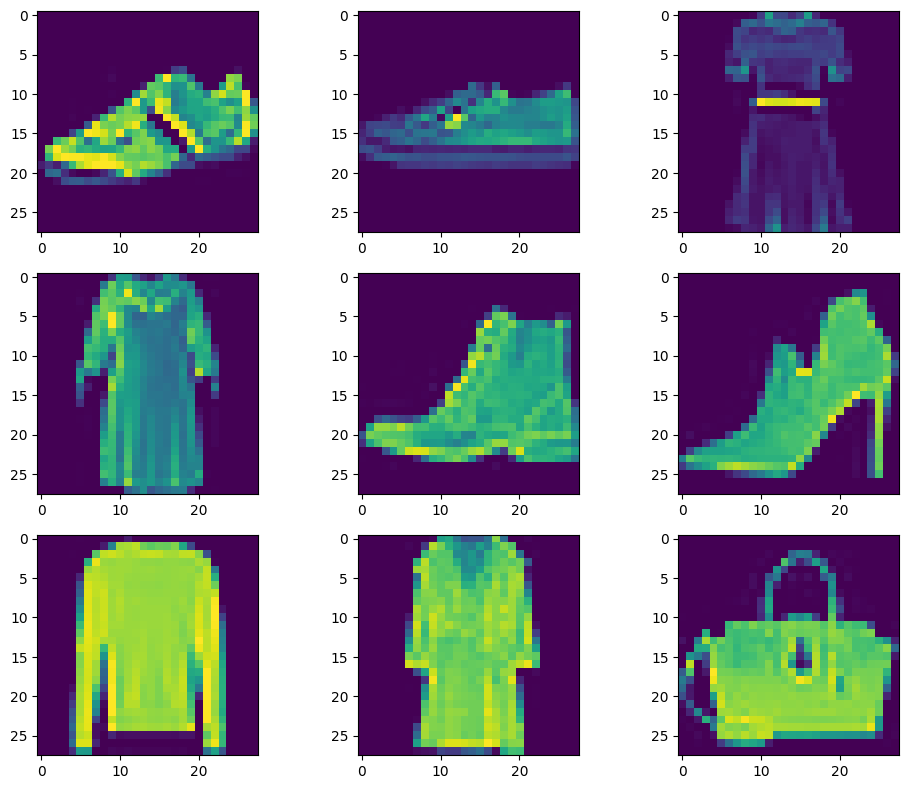

In [9]:
rows, cols = 3,3
fig, ax = plt.subplots(rows,cols,figsize=(10,8))
for r in range(rows):
  for c in range(cols):
    idx = np.random.randint(0,len(train_df))
    ax[r,c].imshow(np.array(train_df.iloc[idx,1:]).reshape(28,28))

plt.tight_layout()
plt.show()

### Implementation using Python

In [11]:
import torch
import torch.nn as nn

In [61]:
X_train = torch.from_numpy(X_train).type(torch.float32)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [62]:
X_test = torch.from_numpy(X_test).type(torch.float32)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [71]:
class FashionMnistModel(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size,hidden_size)
    self.linear2 = nn.Linear(hidden_size,hidden_size)
    self.linear3 = nn.Linear(hidden_size,output_size)
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.linear1(x)
    x = self.sigmoid(x)
    x = self.linear2(x)
    x = self.sigmoid(x)
    x = self.linear3(x)
    x = self.softmax(x)

    return x

In [72]:
print(X_train.shape[1], train_df['label'].nunique())

784 10


In [154]:
model = FashionMnistModel(input_size=X_train.shape[1],
                          hidden_size=500,
                          output_size=train_df['label'].nunique())

In [155]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(),lr=0.01)

In [156]:
# Normalizing the values in X_train, X_test
minmax = lambda x: (x - 0)/(255 - 0)
X_train = minmax(X_train)
X_test = minmax(X_test)

In [157]:
from sklearn.metrics import accuracy_score

NUM_EPOCHS = 100
BATCH_SIZE = 32
train_n_rows = X_train.shape[0]
test_n_rows = X_test.shape[0]
train_losses, test_losses, train_acc, test_acc = [], [], [], []
for epoch in range(NUM_EPOCHS):
  train_epoch_loss = 0.0
  test_epoch_less = 0.0
  for start_idx in range(0,train_n_rows,BATCH_SIZE):
    end_idx = min(start_idx+BATCH_SIZE, train_n_rows)
    X_batch = X_train[start_idx:end_idx]
    y_batch = y_train[start_idx:end_idx]

    # set grad to zero
    optimizer.zero_grad()
    # forward pass
    y_train_pred = model(X_batch)
    # compute loss
    loss = loss_fn(y_train_pred,y_batch)
    train_epoch_loss += loss.item()
    # backward pass
    loss.backward()
    #update parameters
    optimizer.step()

  # test data
  for start in range(0,test_n_rows,BATCH_SIZE):
    end = min(start+BATCH_SIZE, test_n_rows)
    X_batch_tst = X_test[start:end]
    y_batch_tst = y_test[start:end]
    with torch.no_grad():
      y_test_pred = model(X_batch_tst)
      test_loss = loss_fn(y_test_pred,y_batch_tst)
      test_epoch_less += test_loss.item()

  train_losses.append(train_epoch_loss/train_n_rows)
  test_losses.append(test_epoch_less/test_n_rows)
  with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_tr = torch.max(y_pred_train.data, dim=1)
    y_pred_test = model(X_test)
    y_pred_ts = torch.max(y_pred_test.data, dim=1)
  train_acc.append(accuracy_score(y_pred_tr.indices, y_train))
  test_acc.append(accuracy_score(y_pred_ts.indices, y_test))

  if epoch % 5 == 0:
    print(f"Epoch {epoch}, Train Loss: {round(train_epoch_loss/train_n_rows,4)}, Test Loss: {round(test_epoch_less/test_n_rows,4)},\
     Train Acc: {round(train_acc[-1],3)}, Test Acc: {round(test_acc[-1],3)}")

Epoch 0, Train Loss: 0.0584, Test Loss: 0.0572,     Train Acc: 0.632, Test Acc: 0.632
Epoch 5, Train Loss: 0.0539, Test Loss: 0.054,     Train Acc: 0.739, Test Acc: 0.736
Epoch 10, Train Loss: 0.0527, Test Loss: 0.0527,     Train Acc: 0.78, Test Acc: 0.776
Epoch 15, Train Loss: 0.0523, Test Loss: 0.0526,     Train Acc: 0.789, Test Acc: 0.783
Epoch 20, Train Loss: 0.0521, Test Loss: 0.0524,     Train Acc: 0.796, Test Acc: 0.787
Epoch 25, Train Loss: 0.0519, Test Loss: 0.0523,     Train Acc: 0.8, Test Acc: 0.788
Epoch 30, Train Loss: 0.0494, Test Loss: 0.0499,     Train Acc: 0.884, Test Acc: 0.869
Epoch 35, Train Loss: 0.0492, Test Loss: 0.0497,     Train Acc: 0.891, Test Acc: 0.873
Epoch 40, Train Loss: 0.049, Test Loss: 0.0497,     Train Acc: 0.895, Test Acc: 0.876
Epoch 45, Train Loss: 0.0489, Test Loss: 0.0496,     Train Acc: 0.899, Test Acc: 0.877
Epoch 50, Train Loss: 0.0488, Test Loss: 0.0496,     Train Acc: 0.902, Test Acc: 0.878
Epoch 55, Train Loss: 0.0488, Test Loss: 0.0496,  

<Axes: >

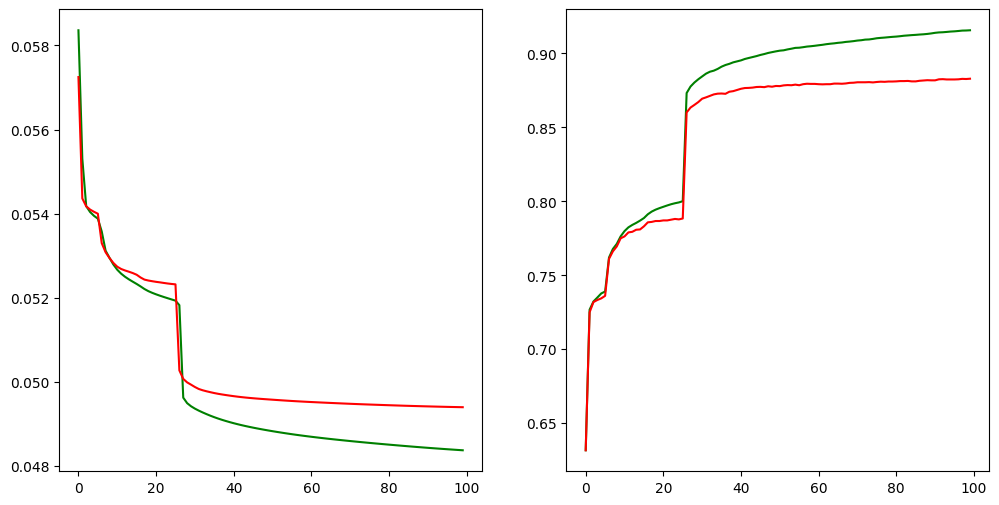

In [158]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.lineplot(x=range(NUM_EPOCHS),y=train_losses,color='green',ax=ax[0])
sns.lineplot(x=range(NUM_EPOCHS),y=test_losses,color='red',ax=ax[0])
sns.lineplot(x=range(NUM_EPOCHS),y=train_acc,color='green',ax=ax[1])
sns.lineplot(x=range(NUM_EPOCHS),y=test_acc,color='red',ax=ax[1])

### Using Numpy from scratch

In [197]:
INPUT_SIZE = X_train.shape[1]
HIDDEN_LAYER = (500,1000,200)
OUTPUT_SIZE = train_df['label'].nunique()
NUM_LAYERS = len(HIDDEN_LAYER) + 1
learning_rate = 0.01
epochs = 20
BATCH_SIZE = 1000
print(INPUT_SIZE,HIDDEN_LAYER,OUTPUT_SIZE,NUM_LAYERS,BATCH_SIZE,learning_rate)

784 (500, 1000, 200) 10 4 1000 0.01


In [202]:
w,b = {},{}
seed = 12345
# Weights initialisation
rng = np.random.default_rng(seed)
for i in range(NUM_LAYERS):
  if i == 0:
    w_size = (HIDDEN_LAYER[i],INPUT_SIZE)
    b_size = (HIDDEN_LAYER[i],1)
  elif i == NUM_LAYERS - 1:
    w_size = (OUTPUT_SIZE,HIDDEN_LAYER[-1])
    b_size = (OUTPUT_SIZE,1)
  else:
    w_size = (HIDDEN_LAYER[i],HIDDEN_LAYER[i-1])
    b_size = (HIDDEN_LAYER[i],1)
  w[i+1] = rng.uniform(-1, 1, size=w_size) * np.sqrt(1 / w_size[1])
  b[i+1] = np.zeros(b_size)

print("Shape of parameters - weights & bias:")
print("Weights\n",w[1].shape,w[2].shape,w[3].shape,w[4].shape)
print("Bias\n",b[1].shape,b[2].shape,b[3].shape,b[4].shape)

Shape of parameters - weights & bias:
Weights
 (500, 784) (1000, 500) (200, 1000) (10, 200)
Bias
 (500, 1) (1000, 1) (200, 1) (10, 1)


In [199]:
def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def der_sigmoid(a):
  return a * (1 - a)

In [200]:
n_rows = X_train.shape[0]
a, h = {}, {}
grad_h, grad_a, grad_w, grad_b = {},{},{},{}
loss_function = 0
epoch_losses = []

for epoch in range(epochs):
  indices = np.arange(n_rows)
  np.random.shuffle(indices)
  X,y = X_train[indices], y_train[indices]
  epoch_loss = 0.0
  for start_idx in range(0, n_rows, BATCH_SIZE):
    end_idx = min(start_idx + BATCH_SIZE, n_rows)

    #Slice the batch
    X_batch = X[start_idx:end_idx]
    y_batch = y[start_idx:end_idx]
    m = X_batch.shape[0]

    # Forward propagation for mini batch
    h[0] = X_batch.T

    for L in range(1,NUM_LAYERS+1):
      a[L] = np.dot(w[L],h[L-1]) + b[L]
      # print(L,a[L].shape)
      if L != NUM_LAYERS:
        h[L] = sigmoid(a[L])
      else:
        h[L] = softmax(a[L])

    # Compute loss function for each iter
    one_hot = np.eye(OUTPUT_SIZE, dtype=int)[y_batch]
    batch_loss = -np.sum(one_hot.T * np.log(h[NUM_LAYERS]))
    epoch_loss += batch_loss

    # Backpropagation
    grad_a[NUM_LAYERS] =  (h[NUM_LAYERS] - one_hot.T)

    for L in range(NUM_LAYERS,0,-1):
      grad_w[L] = np.dot(grad_a[L], h[L-1].T)
      grad_b[L] = grad_a[L]
      grad_h[L-1] = np.dot(w[L].T,grad_a[L])
      grad_a[L-1] = grad_h[L-1] * der_sigmoid(h[L-1])

    # Update the parameters
    for L in range(1,NUM_LAYERS+1):
      w[L] = w[L] - learning_rate * grad_w[L]
      b[L] = b[L] - learning_rate * grad_b[L]

  if (epoch) % 1 == 0:
      print(f"Epoch {epoch+1}: loss = {epoch_loss / (n_rows // BATCH_SIZE):.4f}")
      epoch_losses.append(epoch_loss)

<ipython-input-199-b7c4a0fac625>:2: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


Epoch 1: loss = 2590.1824
Epoch 2: loss = 2302.9381
Epoch 3: loss = 2303.1063
Epoch 4: loss = 2303.3694


KeyboardInterrupt: 

In [203]:
L

2

In [204]:
pd.DataFrame(h[4])

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.104145,0.095236,0.103609,0.094172,0.095895,0.101622,0.092852,0.103439,0.100779,0.097636,...,0.096032,0.098716,0.098648,0.099868,0.096613,0.104395,0.102243,0.104344,0.101635,0.102196
1,0.099503,0.097362,0.099919,0.103945,0.103083,0.103174,0.103233,0.104391,0.094113,0.095133,...,0.097080,0.099871,0.109931,0.104952,0.101166,0.101434,0.101937,0.098941,0.099180,0.096404
2,0.102788,0.101481,0.095939,0.102113,0.103802,0.099731,0.093632,0.096829,0.104818,0.106525,...,0.098837,0.102658,0.102320,0.093466,0.097973,0.098146,0.100995,0.101635,0.097755,0.102435
3,0.099539,0.107910,0.108486,0.097913,0.096053,0.098960,0.106881,0.098002,0.101517,0.095417,...,0.100745,0.100510,0.092186,0.099584,0.095251,0.099751,0.093895,0.097830,0.099547,0.099095
4,0.098859,0.097433,0.095577,0.103636,0.102072,0.098516,0.107675,0.093896,0.098086,0.094156,...,0.103407,0.101233,0.098146,0.099891,0.100523,0.107949,0.099077,0.097820,0.100929,0.099132
5,0.092552,0.098583,0.089331,0.097286,0.105601,0.097345,0.092157,0.099337,0.099085,0.104186,...,0.098563,0.104866,0.096793,0.098656,0.101056,0.095357,0.101015,0.097442,0.093989,0.105794
6,0.103448,0.102481,0.103898,0.107512,0.095822,0.104920,0.103146,0.106565,0.099119,0.108077,...,0.103558,0.099243,0.099028,0.093170,0.099995,0.095623,0.100190,0.106952,0.099794,0.097864
7,0.102672,0.096196,0.101127,0.100590,0.096760,0.096558,0.094131,0.094070,0.096864,0.094227,...,0.096753,0.105268,0.102556,0.099907,0.095005,0.094995,0.097741,0.095083,0.105523,0.101504
8,0.104633,0.100125,0.099052,0.096426,0.098349,0.099411,0.106489,0.104306,0.099359,0.100296,...,0.102975,0.092554,0.100503,0.104093,0.101916,0.097905,0.102374,0.095947,0.102757,0.097986
9,0.091861,0.103193,0.103063,0.096407,0.102562,0.099762,0.099803,0.099166,0.106260,0.104346,...,0.102050,0.095082,0.099889,0.106412,0.110503,0.104445,0.100532,0.104007,0.098890,0.097589


In [196]:
y_batch

array([8, 4, 9, 5, 1, 1, 1, 0, 3, 2, 0, 1, 6, 1, 0, 5, 0, 6, 3, 4, 0, 4,
       3, 3, 4, 2, 4, 4, 0, 3, 8, 2, 7, 3, 9, 0, 2, 0, 4, 2, 5, 3, 7, 8,
       2, 0, 0, 2, 9, 7, 2, 4, 9, 1, 9, 6, 5, 2, 4, 1, 9, 4, 2, 0, 1, 3,
       1, 5, 6, 8, 5, 7, 0, 7, 8, 0, 1, 9, 3, 0, 4, 2, 9, 1, 5, 6, 9, 6,
       9, 5, 6, 5, 4, 3, 6, 5, 8, 1, 0, 9, 0, 7, 2, 6, 7, 9, 7, 2, 6, 6,
       1, 8, 6, 6, 6, 3, 6, 9, 2, 7, 4, 2, 2, 9, 1, 6, 6, 4, 4, 7, 2, 0,
       8, 2, 5, 4, 8, 1, 9, 4, 5, 3, 5, 7, 6, 9, 2, 7, 2, 7, 9, 9, 4, 8,
       5, 6, 7, 6, 7, 3, 9, 4, 8, 7, 4, 7, 3, 4, 5, 0, 6, 0, 9, 7, 4, 4,
       7, 8, 0, 6, 6, 0, 1, 7, 7, 6, 1, 5, 0, 5, 6, 8, 0, 9, 0, 3, 0, 8,
       7, 6, 4, 5, 5, 9, 9, 7, 4, 8, 1, 1, 9, 1, 6, 7, 7, 8, 8, 0, 0, 9,
       7, 5, 3, 5, 1, 5, 1, 5, 0, 1, 6, 4, 8, 6, 2, 3, 3, 7, 8, 0, 4, 3,
       2, 1, 5, 5, 5, 8, 4, 8, 7, 2, 4, 9, 0, 2, 0, 3, 1, 2, 3, 4, 6, 8,
       1, 0, 3, 8, 5, 7, 6, 4, 9, 1, 2, 6, 7, 8, 4, 6, 6, 1, 0, 9, 4, 5,
       1, 2, 5, 2, 8, 0, 0, 4, 8, 8, 2, 6, 0, 1, 4,

In [166]:

a_tr, h_tr = a.copy(), h.copy()

In [168]:
# Forward propagation for mini batch
h[0] = X_test[:1000].T

for L in range(1,NUM_LAYERS+1):
  a[L] = np.dot(w[L],h[L-1]) + b[L]
  # print(L,a[L].shape)
  if L != NUM_LAYERS:
    h[L] = sigmoid(a[L])
  else:
    h[L] = softmax(a[L])

<ipython-input-164-b7c4a0fac625>:2: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


In [170]:
pd.DataFrame(np.log(h[NUM_LAYERS]))

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-2.406706,-2.302118,-2.316550,-2.266492,-2.355510,-2.342649,-2.354411,-2.284385,-2.217852,-2.208868,...,-2.332889,-2.349066,-2.281631,-2.373442,-2.245421,-2.327872,-2.279134,-2.348178,-2.376404,-2.273734
1,-2.306080,-2.279322,-2.353724,-2.239052,-2.187825,-2.238561,-2.257424,-2.305762,-2.346801,-2.268195,...,-2.272102,-2.238719,-2.304004,-2.300276,-2.232913,-2.372079,-2.152513,-2.313262,-2.257702,-2.235455
2,-2.309626,-2.357965,-2.360744,-2.303859,-2.288599,-2.352535,-2.344276,-2.357897,-2.328351,-2.371202,...,-2.295737,-2.320414,-2.336027,-2.295498,-2.233550,-2.322131,-2.276406,-2.246465,-2.309418,-2.414684
3,-2.283642,-2.282175,-2.252349,-2.303638,-2.407304,-2.340977,-2.162327,-2.266009,-2.339700,-2.254557,...,-2.223963,-2.348283,-2.243557,-2.266501,-2.392336,-2.274409,-2.403079,-2.297907,-2.353773,-2.343541
4,-2.219429,-2.366787,-2.328325,-2.309783,-2.305117,-2.281246,-2.413790,-2.275229,-2.296852,-2.353702,...,-2.376620,-2.330468,-2.235126,-2.305221,-2.301623,-2.333486,-2.186702,-2.233690,-2.267832,-2.290055
5,-2.280713,-2.235744,-2.304299,-2.340860,-2.251885,-2.275854,-2.333952,-2.225091,-2.323933,-2.362156,...,-2.254496,-2.230828,-2.286524,-2.332829,-2.253609,-2.321604,-2.411659,-2.301709,-2.239766,-2.243509
6,-2.235097,-2.220629,-2.297657,-2.309613,-2.331687,-2.245619,-2.228408,-2.344678,-2.364061,-2.332636,...,-2.328259,-2.271382,-2.434531,-2.241310,-2.378287,-2.189176,-2.275583,-2.262711,-2.331012,-2.263090
7,-2.369332,-2.326911,-2.267233,-2.343576,-2.347725,-2.308479,-2.330005,-2.385437,-2.179154,-2.234191,...,-2.389769,-2.326212,-2.298175,-2.294451,-2.359333,-2.341015,-2.396907,-2.286940,-2.233936,-2.259347
8,-2.281671,-2.328075,-2.263171,-2.327037,-2.293252,-2.373142,-2.245942,-2.277124,-2.327829,-2.309255,...,-2.220658,-2.353283,-2.364577,-2.311862,-2.331200,-2.233408,-2.305867,-2.382491,-2.286200,-2.347233
9,-2.348569,-2.337071,-2.287992,-2.286690,-2.273760,-2.276661,-2.383287,-2.314663,-2.317445,-2.346531,...,-2.347805,-2.267218,-2.257946,-2.310075,-2.314144,-2.324693,-2.375345,-2.363478,-2.383565,-2.371724


In [171]:
y_test[:1000]

array([0, 1, 2, 2, 3, 2, 8, 6, 5, 0, 3, 4, 4, 6, 8, 5, 6, 3, 6, 4, 4, 4,
       2, 1, 5, 7, 8, 4, 4, 1, 5, 7, 7, 8, 1, 0, 9, 8, 0, 8, 2, 0, 4, 6,
       2, 0, 3, 3, 2, 3, 2, 2, 9, 3, 0, 9, 9, 4, 6, 0, 4, 5, 4, 6, 1, 1,
       0, 9, 5, 2, 7, 3, 4, 6, 5, 7, 1, 6, 1, 4, 9, 8, 1, 2, 4, 8, 9, 4,
       1, 6, 3, 4, 2, 2, 2, 6, 4, 7, 7, 3, 9, 3, 9, 0, 8, 2, 3, 8, 2, 7,
       5, 5, 3, 2, 7, 5, 0, 2, 7, 1, 0, 5, 4, 4, 7, 0, 8, 5, 0, 3, 1, 7,
       9, 4, 9, 6, 4, 4, 2, 4, 3, 3, 3, 2, 2, 6, 0, 0, 1, 3, 4, 3, 3, 1,
       9, 3, 3, 3, 9, 5, 6, 7, 7, 3, 2, 4, 0, 8, 7, 2, 2, 8, 9, 0, 2, 4,
       4, 5, 7, 9, 9, 1, 3, 9, 1, 5, 5, 6, 0, 7, 4, 9, 1, 6, 0, 0, 0, 4,
       0, 9, 0, 4, 2, 5, 5, 8, 6, 2, 1, 9, 0, 4, 7, 1, 9, 5, 9, 0, 2, 8,
       5, 7, 7, 3, 2, 4, 5, 7, 8, 1, 9, 5, 6, 2, 9, 7, 4, 0, 9, 2, 1, 5,
       7, 7, 0, 2, 4, 5, 3, 3, 8, 1, 6, 2, 4, 8, 6, 9, 8, 3, 3, 2, 4, 2,
       2, 9, 3, 9, 2, 8, 6, 8, 8, 2, 7, 2, 5, 5, 9, 5, 8, 2, 4, 8, 4, 8,
       3, 1, 2, 2, 2, 1, 8, 1, 3, 3, 4, 1, 7, 0, 5,